In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# 1 Análise inicial do dataset

  O dataset foi transformado em um dataframe utilizando a biblioteca Pandas para que possa ser realizado o tratamento dos dados

  Com o cabeçalho informando as primeiras linhas, pude visualizar as labels e como os dados estão apresentados no dataset

  Utilizei os métodos info() e isna() para verificar a qualidade dos dados, analisando os tipos dos dados e se há dados nulos em alguma coluna.

  Também verifiquei a maior e menor nota do IMDB dos filmes presentes no dataset

In [3]:
df = pd.read_csv('desafio_indicium_imdb.csv').drop('Unnamed: 0',axis=1)

df.head(6)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
5,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [5]:
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
print(f"Max: {df['IMDB_Rating'].max()}") 
print(f"Min: {df['IMDB_Rating'].min()}")

Max: 9.2
Min: 7.6


# 2 Análise de Faturamento

  Fazer tratamento dos dados da coluna Gross e analisar estatísticas de faturamento

  Removi as vírgulas dos valores da coluna Gross e transformei os dados do tipo Object em Float

  Então podendo realizar cálculos com os dados, calculei o faturamento médio, mediano, máximo, mínimo e apresentei os 10 maiores faturamentos

  Fiz também uma representação dos 10 maiores faturamentos com Seaborn e MatPlotLib.

In [17]:
df['Gross'] = df['Gross'].apply(lambda x: float(str(x).replace(',','')) if pd.notna(x) else np.nan)
df['Gross']

0      134966411.0
1      534858444.0
2       57300000.0
3        4360000.0
4      377845905.0
          ...     
994            NaN
995            NaN
996     30500000.0
997            NaN
998            NaN
Name: Gross, Length: 999, dtype: float64

In [59]:
print(f"Faturamento médio: ${df['Gross'].mean():,.0f}")
print(f"Faturamento mediano: ${df['Gross'].median():,.0f}")
print(f"Faturamento máximo: ${df['Gross'].max():,.0f}")
print(f"Faturamento mínimo: ${df['Gross'].min():,.0f}")
print('\n')
print("10 MAIORES FATURAMENTOS")
df.nlargest(10, 'Gross')[['Series_Title', 'Gross', 'IMDB_Rating', 'Released_Year']]



Faturamento médio: $68,082,574
Faturamento mediano: $23,457,440
Faturamento máximo: $936,662,225
Faturamento mínimo: $1,305


10 MAIORES FATURAMENTOS


,Series_Title,Gross,IMDB_Rating,Released_Year
476,Star Wars: Episode VII - The Force Awakens,936662225.0,7.9,2015
58,Avengers: Endgame,858373000.0,8.4,2019
622,Avatar,760507625.0,7.8,2009
59,Avengers: Infinity War,678815482.0,8.4,2018
651,Titanic,659325379.0,7.8,1997
356,The Avengers,623279547.0,8.0,2012
890,Incredibles 2,608581744.0,7.6,2018
1,The Dark Knight,534858444.0,9.0,2008
581,Rogue One,532177324.0,7.8,2016
62,The Dark Knight Rises,448139099.0,8.4,2012


C:\Users\leosa\AppData\Local\Temp\ipykernel_14160\1796408360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Series_Title', x='Gross', palette='plasma')


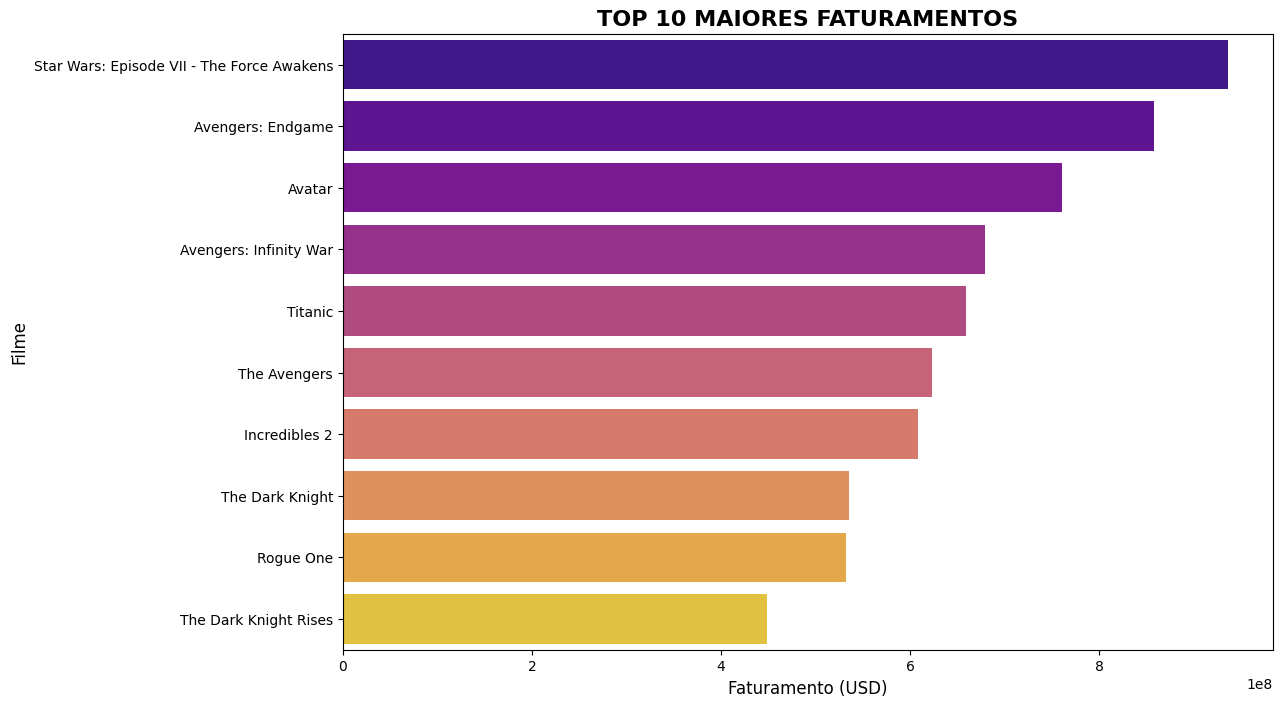

In [61]:
plt.figure(figsize=(12, 8))

top_10 = df.nlargest(10, 'Gross')

sns.barplot(data=top_10, y='Series_Title', x='Gross', palette='plasma')
plt.title('TOP 10 MAIORES FATURAMENTOS', fontsize=16, fontweight='bold')
plt.xlabel('Faturamento (USD)', fontsize=12)
plt.ylabel('Filme', fontsize=12)

plt.show()

# 3 Análise Temporal
  
  Fazer a média de notas dos anos com maior número de lançamentos

  Foi necessário transformar o ano de lançamento de 'Apollo 13' da String 'PG' para o Int '1995', seu real Ano de Lançamento

 Então utilizei o Counter() para analisar quais os anos com maior quantidade de lançamentos e pegar a média de suas notas

In [19]:
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

df['Released_Year'] = df['Released_Year'].apply(lambda x: int(str(x)) if pd.notna(x) else np.nan)

df['Released_Year']

0      1972
1      2008
2      1974
3      1957
4      2003
       ... 
994    1961
995    1956
996    1953
997    1944
998    1935
Name: Released_Year, Length: 999, dtype: int64

In [23]:
years = Counter(df['Released_Year'])

for year, count in years.most_common(15):
  
  avg_rate = df[df['Released_Year']==year]['IMDB_Rating'].mean()
  avg_gross = df[df['Released_Year']==year]['Gross'].mean()

  print(f"{year} ({count}): {avg_rate:.1f} | ${avg_gross:.0f}")

print(f"Ano de lançamento médio: {df['Released_Year'].mean():,.0f}")
print(f"Mediana do ano de lançamento: {df['Released_Year'].median():,.0f}")
print(f"Ano de lançamento mais recente: {df['Released_Year'].max():,.0f}")
print(f"Ano de lançamento mais antigo: {df['Released_Year'].min():,.0f}")

2014 (32): 7.9 | $88891265
2004 (31): 7.9 | $49884501
2009 (29): 7.9 | $117486823
2016 (28): 7.9 | $112850323
2013 (28): 7.9 | $47605822
2001 (27): 7.9 | $83912757
2006 (26): 7.9 | $49970265
2007 (26): 7.9 | $39175921
2015 (25): 7.9 | $107058125
2012 (24): 7.9 | $121076954
1993 (23): 7.9 | $54205878
2010 (23): 7.9 | $113191904
2019 (23): 8.0 | $150421418
2003 (22): 7.9 | $70809611
2017 (22): 7.9 | $103065643
Ano de lançamento médio: 1,991
Mediana do ano de lançamento: 1,999
Ano de lançamento mais recente: 2,020
Ano de lançamento mais antigo: 1,920


# 4 Análise por gênero

Fazer análise de gêneros mais comuns dos filmes

Separei os gêneros, logo que alguns filmes se apresentaram com mais de um

Após, calculei a média de notas de cada gênero e sua frequência na lista de filmes

Usando o WordCloud e o MatPlotLib fiz uma representação de nuvem com base nos gêneros.


In [31]:

all_genres = []
for genres in df['Genre']:
  genre_list = [g.strip() for g in genres.split(',')]
  all_genres.extend(genre_list)

genres_counts = Counter(all_genres)

print(f'Quantidade de gêneros: {len(genres_counts)}\n')

for genre,count in genres_counts.most_common(21):

  perc = (count/len(df)) * 100

  avg_grate = df[df['Genre'].str.contains(genre,case=False)]['IMDB_Rating'].mean()
  avg_gross = df[df['Genre'].str.contains(genre,case=False)]['Gross'].mean()

  print(f"{genre}: {avg_grate:.1f} ({perc:.1f}%) ")
  print(f"Média de faturamento: ${avg_gross:.0f}\n")



Quantidade de gêneros: 21

Drama: 8.0 (72.4%) 
Média de faturamento: $46089398

Comedy: 7.9 (23.3%) 
Média de faturamento: $64125296

Crime: 8.0 (20.9%) 
Média de faturamento: $40680140

Adventure: 8.0 (19.6%) 
Média de faturamento: $165731279

Action: 7.9 (18.9%) 
Média de faturamento: $141239283

Thriller: 7.9 (13.7%) 
Média de faturamento: $58676627

Romance: 7.9 (12.5%) 
Média de faturamento: $40358847

Biography: 7.9 (10.9%) 
Média de faturamento: $55256019

Mystery: 8.0 (9.9%) 
Média de faturamento: $41274382

Animation: 7.9 (8.2%) 
Média de faturamento: $127967528

Sci-Fi: 8.0 (6.7%) 
Média de faturamento: $148026397

Fantasy: 7.9 (6.6%) 
Média de faturamento: $108616842

History: 8.0 (5.6%) 
Média de faturamento: $55539532

Family: 7.9 (5.6%) 
Média de faturamento: $92932657

War: 8.0 (5.1%) 
Média de faturamento: $38078294

Music: 7.9 (3.5%) 
Média de faturamento: $30267814

Horror: 7.9 (3.2%) 
Média de faturamento: $40002359

Western: 8.0 (2.0%) 
Média de faturamento: $535188

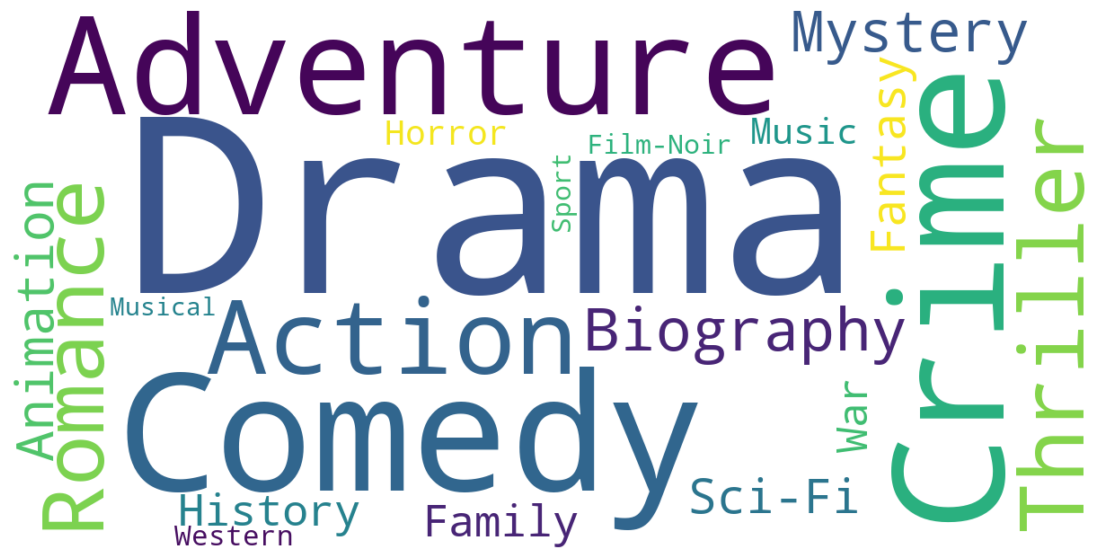

In [32]:
wc = WordCloud(width=1200,height=600,background_color='white',colormap='viridis')

wc.generate_from_frequencies(genres_counts)

plt.figure(figsize=(14,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

# 5 Análise de Diretores e Atores

Fazer média de notas do IMDB dos diretores e dos atores com mais filmes no dataset

Para fazer a análise dos atores, agrupei as colunas Star1, Star2, Star3 e Star4 para ter uma visão mais ampla dos atores mais presentes nos filmes do dataset

No final, apresentei com barplots tanto a relação dos 20 diretores com maior frequência quanto dos 20 atores com maior frequência com a média de nota de seus filmes no IMDB 

In [15]:
top_directors = df['Director'].value_counts().head(50).index.tolist()

df['Director'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')

df['Director']

0      Francis Ford Coppola
1         Christopher Nolan
2      Francis Ford Coppola
3              Sidney Lumet
4             Peter Jackson
               ...         
994                   Other
995                   Other
996          Fred Zinnemann
997        Alfred Hitchcock
998        Alfred Hitchcock
Name: Director, Length: 999, dtype: object

In [52]:
director_counts = df['Director'].value_counts().head(20)

directors_data = []
for director, counter in director_counts.items():
  avg_drating = df[df['Director']==director]['IMDB_Rating'].mean()
  avg_gross = df[df['Director']==director]['Gross'].mean()
  max_gross = df[df['Director']==director]['Gross'].max()

  print(f'{director}: {avg_drating:.1f} | {counter} filmes')
  print(f'Faturamento máximo: ${max_gross:.0f}')
  print(f'Faturamento médio: ${avg_gross:.0f}\n')

  directors_data.append({
        "Director": director,
        "Films": counter,
        "Avg_IMDB_Rating": avg_drating,
    })


Alfred Hitchcock: 8.0 | 14 filmes
Faturamento máximo: $36764313
Faturamento médio: $13234378

Steven Spielberg: 8.0 | 13 filmes
Faturamento máximo: $435110554
Faturamento médio: $190625628

Hayao Miyazaki: 8.0 | 11 filmes
Faturamento máximo: $15090400
Faturamento médio: $5577654

Martin Scorsese: 8.2 | 10 filmes
Faturamento máximo: $132384315
Faturamento médio: $53831920

Akira Kurosawa: 8.2 | 10 filmes
Faturamento máximo: $4135750
Faturamento médio: $1139155

Billy Wilder: 8.1 | 9 filmes
Faturamento máximo: $25000000
Faturamento médio: $11820816

Stanley Kubrick: 8.2 | 9 filmes
Faturamento máximo: $56954992
Faturamento médio: $30635612

Woody Allen: 7.8 | 9 filmes
Faturamento máximo: $56816662
Faturamento médio: $30696910

Christopher Nolan: 8.5 | 8 filmes
Faturamento máximo: $534858444
Faturamento médio: $242181763

Quentin Tarantino: 8.2 | 8 filmes
Faturamento máximo: $162805434
Faturamento médio: $90879290

David Fincher: 8.0 | 8 filmes
Faturamento máximo: $167767189
Faturamento mé

C:\Users\leosa\AppData\Local\Temp\ipykernel_14160\1715544304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


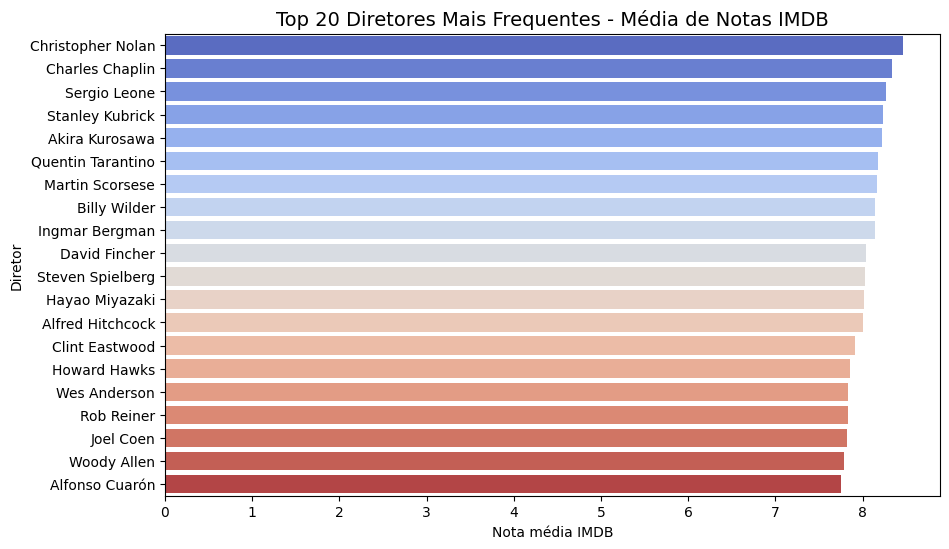

In [53]:
directors_df = pd.DataFrame(directors_data)

plt.figure(figsize=(10,6))
sns.barplot(
    data=directors_df.sort_values("Avg_IMDB_Rating", ascending=False),
    x="Avg_IMDB_Rating",
    y="Director",
    palette="coolwarm"
)
plt.title("Top 20 Diretores Mais Frequentes - Média de Notas IMDB", fontsize=14)
plt.xlabel("Nota média IMDB")
plt.ylabel("Diretor")
plt.show()

In [57]:
all_stars = []
for stars in ['Star1','Star2','Star3','Star4']:
  all_stars.extend(df[stars].tolist())

stars_counts = Counter(all_stars).most_common(20)

print(f'Quantidade de Atores: {len(stars_counts)}\n')

stars_data = []
for star,count in stars_counts:

  actor_movies = df[
    (df['Star1'] == star) |
    (df['Star2'] == star) |
    (df['Star3'] == star) |
    (df['Star4'] == star)
    ]
  
  avg_srate = actor_movies['IMDB_Rating'].mean()
  avg_gross = actor_movies['Gross'].mean()

  stars_data.append({
        "Actor": star,
        "Films": count,
        "Avg_IMDB_Rating": avg_srate,
    })

  print(f"{star} ({count}): {avg_srate:.1f}")
  print(f"Faturamento médio: ${avg_gross:.0f}\n")

Quantidade de Atores: 20

Robert De Niro (17): 8.1
Faturamento médio: $58921542

Tom Hanks (14): 8.0
Faturamento médio: $207397499

Al Pacino (13): 8.1
Faturamento médio: $49324030

Brad Pitt (12): 8.0
Faturamento médio: $87519386

Clint Eastwood (12): 8.0
Faturamento médio: $51721819

Christian Bale (11): 8.0
Faturamento médio: $146949035

Leonardo DiCaprio (11): 8.1
Faturamento médio: $186299764

Matt Damon (11): 8.0
Faturamento médio: $157140145

James Stewart (10): 8.1
Faturamento médio: $12333523

Humphrey Bogart (9): 8.0
Faturamento médio: $3044548

Ethan Hawke (9): 7.9
Faturamento médio: $28524884

Johnny Depp (9): 7.7
Faturamento médio: $59459246

Denzel Washington (9): 7.7
Faturamento médio: $76874423

Michael Caine (9): 8.1
Faturamento médio: $128757710

Scarlett Johansson (9): 7.9
Faturamento médio: $159979283

Aamir Khan (8): 8.2
Faturamento médio: $4761731

Harrison Ford (8): 8.3
Faturamento médio: $209558907

Toshirô Mifune (7): 8.2
Faturamento médio: $182814

Russell Cro

C:\Users\leosa\AppData\Local\Temp\ipykernel_14160\4129943138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


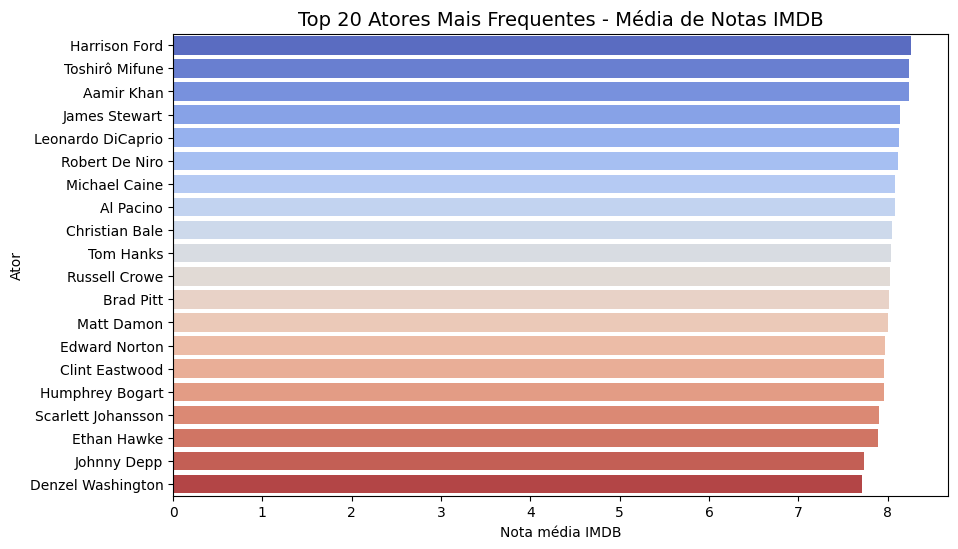

In [58]:
stars_df = pd.DataFrame(stars_data)

plt.figure(figsize=(10,6))
sns.barplot(
    data=stars_df.sort_values("Avg_IMDB_Rating", ascending=False),
    x="Avg_IMDB_Rating",
    y="Actor",
    palette="coolwarm"
)
plt.title("Top 20 Atores Mais Frequentes - Média de Notas IMDB", fontsize=14)
plt.xlabel("Nota média IMDB")
plt.ylabel("Ator")
plt.show()

# 6 Análise de Classificação Indicativa

  Fiz uma análise da média das notas e faturamento com base nas Classificações Indicativas dos filmes do dataset, sem contar os valores NaN

  Após, apresentei em um histograma a quantidade de filmes por Classificação.

In [392]:
certificate_count = Counter(df['Certificate'])

print(f"Quantidade de classificações indicativas: {len(certificate_count)}")

for c, counter in certificate_count.most_common(10):
  avg_crate = df[df['Certificate']==c]['IMDB_Rating'].mean()
  max_rate = df[df['Certificate']==c]['IMDB_Rating'].max()
  min_rate = df[df['Certificate']==c]['IMDB_Rating'].min()
  avg_gross = df[df['Certificate']==c]['Gross'].mean()
  print(f"{c} ({counter}): {avg_crate:.1f} | Max - {max_rate} | Min - {min_rate}")
  print(f"Média de faturamento: ${avg_gross:.0f}\n")


Quantidade de classificações indicativas: 17
U (234): 8.0 | Max - 9.0 | Min - 7.6
Média de faturamento: $87246581

A (196): 8.0 | Max - 9.2 | Min - 7.6
Média de faturamento: $64085712

UA (175): 8.0 | Max - 9.0 | Min - 7.6
Média de faturamento: $131145955

R (146): 7.9 | Max - 8.6 | Min - 7.6
Média de faturamento: $25793599

nan (101): nan | Max - nan | Min - nan
Média de faturamento: $nan

PG-13 (43): 7.8 | Max - 8.6 | Min - 7.6
Média de faturamento: $36947857

PG (37): 7.9 | Max - 8.6 | Min - 7.6
Média de faturamento: $17888273

Passed (34): 8.0 | Max - 8.4 | Min - 7.6
Média de faturamento: $5435554

G (12): 8.0 | Max - 8.5 | Min - 7.6
Média de faturamento: $49596326

Approved (11): 7.9 | Max - 8.1 | Min - 7.7
Média de faturamento: $6949014



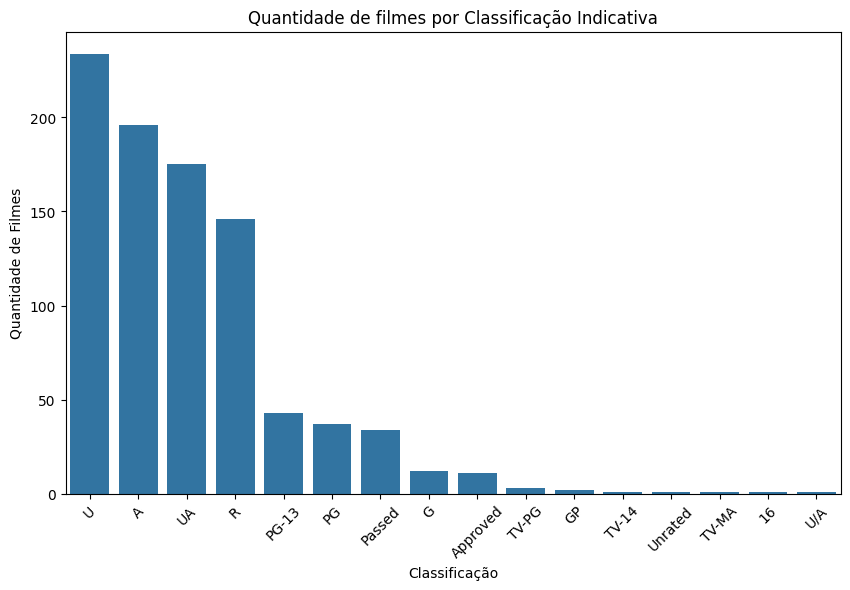

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Certificate", order=df["Certificate"].value_counts().index)
plt.title("Quantidade de filmes por Classificação Indicativa")
plt.xlabel("Classificação")
plt.ylabel("Quantidade de Filmes")
plt.xticks(rotation=45)
plt.show()


# 7 Análise de dados numéricos

  Fiz a transformação dos dados de Runtime para float e então criei com o método describe() uma tabela com a descrição dos valores numéricos do dataset contendo a quantidade de dados válidos, a média, o desvio padrão, valor mínimo, valor máximo e valores de 25%, 50% e 75% entre o mínimo e máximo

  Utilizei o método corr() para fazer uma matriz com a correlação entre todos os dados numéricos e a representei com um heatmap através do Seaborn e MatPlotLib

  E, por fim, coloquei em evidência as porcentagens de correlação das Notas do IMDB e as de faturamento com os outros dados numéricos as apresentei de maior nível de correlação para menor

In [33]:
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(float)


In [34]:
numeric_cols = ['Released_Year','Runtime','IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
df[numeric_cols].describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.218218,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.297166,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


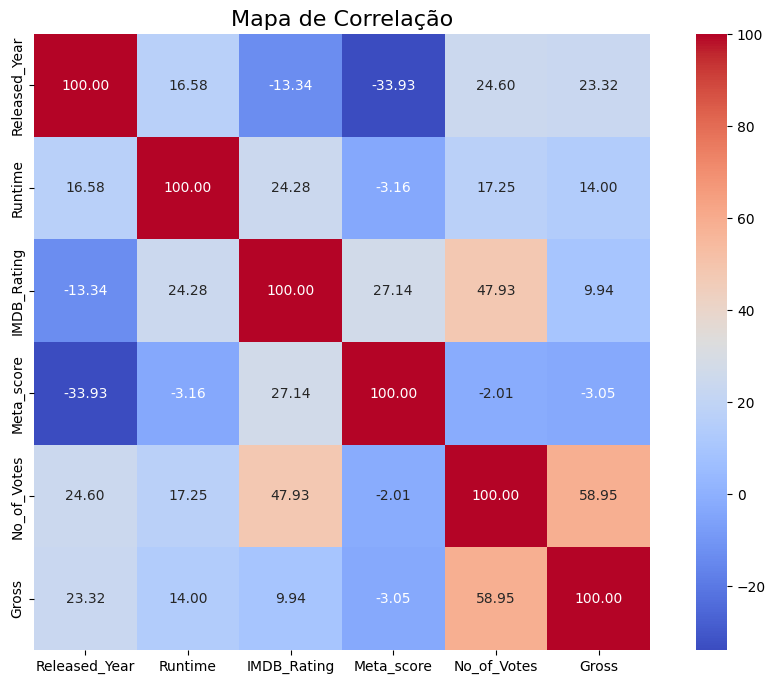

In [39]:
matrix = df[numeric_cols].corr() * 100

plt.figure(figsize=(12,8))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="coolwarm",cbar=True,square=True)

plt.title("Mapa de Correlação", fontsize=16)
plt.show()

In [344]:
imdb_corr = matrix['IMDB_Rating'].drop('IMDB_Rating').sort_values(ascending=False)

for var, corr in imdb_corr.items():
  if not pd.isna(corr):
    print(f"{var}: {corr:.2f}%")

No_of_Votes: 47.93%
Meta_score: 27.14%
Runtime: 24.28%
Gross: 9.94%
Released_Year: -13.34%


In [194]:
gross_corr = matrix['Gross'].drop('Gross').sort_values(ascending=False)

for var, corr in gross_corr.items():
  if not pd.isna(corr):
    print(f"{var}: {corr:.2f}%")

No_of_Votes: 58.95%
Released_Year: 23.32%
Runtime: 14.00%
IMDB_Rating: 9.94%
Meta_score: -3.05%


# 8 Análise de sinopse

Analisar se as tramas estão relacionadas com faturamento, notas no IMDB e gêneros que estão relacionadas

Utilizei o CountVectorizer() do Scikit-learn para conseguir remover palavras comuns como pronomes, preposições e artigos e focar apenas em substantivos e verbos que possam trazer informações sobre o que se trama o filme

Usando o WordCloud e o MatPlotLib fiz uma representação de nuvem das palavras mais frequentes.


In [28]:
vector = CountVectorizer(stop_words='english',min_df=2,token_pattern=r'\b[a-zA-Z]{4,}\b',ngram_range=(1,2))

word_matrix = vector.fit_transform(df['Overview'])
words = vector.get_feature_names_out()
word_count = word_matrix.sum(axis=0).A1

word_freq = Counter(dict(zip(words,word_count)))

print("20 palavras mais comuns")

for word, count in word_freq.most_common(20):

    w_data = df[df['Overview'].str.contains(word,case=False)]

    all_g = []
    for genres in w_data['Genre'].dropna():
        g_list = [g.strip() for g in str(genres).split(',')]
        all_g.extend(g_list)

    g_counts = Counter(all_g)

    top_genre = ', '.join([f'{genre}({counter})' for genre,counter in g_counts.most_common(2)])

    print(f"{word} ({count}): {top_genre}")
    

20 palavras mais comuns
young (132): Drama(101), Comedy(34)
life (111): Drama(94), Comedy(22)
world (85): Drama(62), Adventure(28)
family (66): Drama(46), Crime(16)
woman (65): Drama(55), Romance(24)
story (63): Drama(64), Biography(33)
love (61): Drama(65), Romance(34)
finds (47): Drama(35), Comedy(14)
father (45): Drama(36), Adventure(10)
help (45): Drama(38), Comedy(13)
wife (44): Drama(37), Romance(15)
girl (42): Drama(38), Comedy(19)
american (40): Drama(29), Biography(12)
friends (39): Drama(39), Comedy(21)
year (39): Drama(57), Romance(13)
years (38): Drama(30), Crime(9)
city (33): Drama(17), Crime(12)
lives (33): Drama(28), Comedy(9)
murder (32): Drama(39), Crime(34)
town (32): Drama(25), Crime(10)


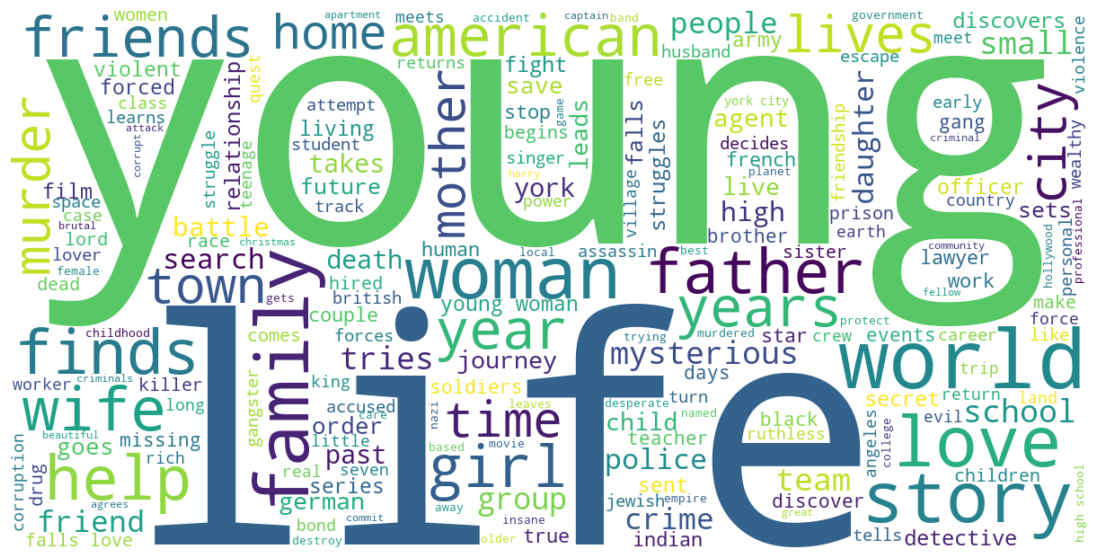

In [29]:
wc = WordCloud(width=1200,height=600,background_color='white',colormap='viridis')

wc.generate_from_frequencies(word_freq)

plt.figure(figsize=(14,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()



# 9 Insights iniciais

Foi possível analisar inicialmente que as notas dos filmes presentes no dataset variam entre 7.6 a 9.2, sendo uma coleção de filmes bem avaliados.

Temos uma baixa correlação entre os dados numéricos para com a nota do filme no IMDB, tendo no máximo 47.9% de correlação com o número dos votos. Foi apresentada uma porcentagem negativa em relação ao ano de lançamento, mas tendo em vista a média de notas por ano de lançamento, que variou de 7.9 à 8.0, a mais alta é de 2019, assim como a média de faturamento. Além disso, temos 27.1% de correlação com as notas do Meta, 24.3% da duração do filme e ainda menos com o faturamento, com 9.9%. No faturamento, os filmes entre $100m e $1bi tem a maior média de nota no IMDB, sendo por volta de 8, com a faixa de $100mi a $500mi tendo a maior nota (9,2). Aqui notei que em relação a valores específicos a nota do IMDB não apresenta um padrão, porém ao categorizar os dados, como em décadas ou faixa de faturamento, é possível notar maiores semelhanças.  

Em relação aos diretores, ao pegarmos os 20 com maior quantidades de filmes no dataset, temos uma maior variância entre as notas, tendo como maior média os filmes de Christopher Nolan (8.5), além de também ser o dono do filme de maior faturamento do top 20. Já com atores, há uma média de menores notas os filmes com participação de Johnny Depp e Denzel Washington (7.7) e maiores o Harrison Ford (8.3), além de ser o ator com maior média de faturamento nos filmes que participa. Nesta análise observei que a nota do IMDB costuma ser maior com diretores e atores específicos, e isso se demonstra proporcionalmente ao faturamento de seus filmes, que também costumam ser maiores.

Analisando os gêneros dos filmes não há uma grande variância entre as notas do IMDB, variando entre 7.9 e 8.0, porém ao verificar a média de faturamento é possível afirmar que filmes de Ação, Aventura, Sci-Fi, Animação e Fantasia se destacam entre os mais consumidos.

Já ao analisarmos as Classificações indicativas, tivemos como resultados de média de notas do IMDB similares, entre 7.8 e 8.0. Mostra-se que PG-13 contém a menor média de notas no IMDB e que filmes classificados como UA tem a maior média de faturamento.

Ao analisar a coluna Overview, com as descrições dos filmes, foram separadas as 20 palavras que aparecem com mais frequência no dataset para averiguar uma possível relação com o gênero, nota do IMDB e faturamento. Por ser o gênero da maioria dos filmes, o gênero Drama aparece como o mais comum em todas as palavras do top 20, porém verificando o segundo gênero é possível dizer que palavras como "cidade", "assassinato" e "família" estão bem relacionadas com filmes de Crime, "mulher" e "esposa" com Romance, "americano" e "história" com Biografia, "mundo" e "pai" com Aventura e o restante com Comédia. 

Portanto, respondendo algumas perguntas:

a) Qual filme você recomendaria para uma pessoa que você não conhece? 

Para alguém que eu não conheça eu recomendaria The Dark Knight. É um filme de Ação com classificação etária UA com atores e diretor (Christian Bale, Heath Ledger, Michael Caine e Christian Nolan) bem queridos pelo público de acordo com notas do IMDB e o faturamento de seus filmes.

b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?  

Filmes lançado após 2008 que tenham os gêneros Aventura, Ação ou Animação e tenham classificação indicativa de UA. Ainda entre os principais fatores estão os filmes estrelados por Christian Bale, Leonardo DiCaprio, Scarlet Johansson ou Harrison Ford e filmes dirigidos por Christian Nolan ou James Cameron.

c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Sim, é possível inferir o gênero a partir da coluna! Como dito anteriormente, além de estarem relacionadas a filmes de drama é possível inferir que descrições de filmes com as palavras "cidade", "assassinato" e "família" sejam de filmes de Crime, "mulher" e "esposa" de Romance, "americano" e "história" de Biografia, "mundo" e "pai" de Aventura e "jovem", "vida", "encontra", "ajuda" e "amigos" de Comédia.